In [78]:
import numpy as np
import csv
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib
from ipywidgets import interact
import seaborn as sns
import os
import os.path


class PrettySentences:

    def split(self, file):
        with open(file, encoding="utf8") as cur_file:
            txt = cur_file.read()
            txt = str(txt)
            txt = txt.split("Read")
            return txt

    def classification(self, txt_array, file_index):
        id = np.array([])
        date = np.array([])
        time = np.array([])
        device = np.array([])
        content = np.array([])

        count = 0
        for ite in range(1, np.size(txt_array), 1):
            if txt_array[ite].find("\n"+"YOUR_NAME") != -1:
                cur_sentence = txt_array[ite][txt_array[ite].rfind("\n"+"YOUR_NAME") + len("\n"+"YOUR_NAME")+1:txt_array[ite].find("\u200b")]
                count += 1
                id = np.append(id, str(file_index) + '.' + str(count))
                device = np.append(device, cur_sentence[cur_sentence.find("come from") + 10:].split("\n")[0])
                content = np.append(content, str(cur_sentence[cur_sentence.find("\n") + 1:]))
                if cur_sentence != '':
                    start = cur_sentence[0:11].rfind("-")
                    end = cur_sentence[0:16].rfind(":")
                    date = np.append(date, cur_sentence[0:start+3])
                    time = np.append(time, cur_sentence[end-2:end+3])
                else:
                    date = np.append(date, '')
                    time = np.append(time, '')


        flag = 0
        if count != len(time):
            print("Error: time and sentence do not have same size in file {}".format(str(file_index)))
            flag = 1
        if count != len(device):
            print("Error: device and sentence do not have same size in file {}".format(str(file_index)))
            flag = 1
        if count != len(content):
            print("Error: content and sentence do not have same size in file {}".format(str(file_index)))
            flag = 1

        if flag == 1:
            id = np.array([])
            date = np.array([])
            time = np.array([])
            device = np.array([])
            content = np.array([])

        return id, date, time, device, content


def write_csv(all_weibo):
    id, date, time, device, content = zip(*all_weibo)
    id = np.array(id).flatten()
    date = np.array(date).flatten()
    time = np.array(time).flatten()
    device = np.array(device).flatten()
    content = np.array(content).flatten()

    with open('weibo.csv', "w", encoding="utf8") as csvFile:  # wb
        writer = csv.writer(csvFile)
        # write the title of csv file
        writer.writerow(['id', 'date', 'time', 'device', 'content'])

        # write the elements of weibo
        for i in range(len(id)):
            row = [id[i], date[i], time[i], device[i], content[i]]
            writer.writerow(row)
    csvFile.close()

def test():
    instance = PrettySentences()
    txt = instance.split("1001030102/source/2")
    txt_array = np.array(txt)
    print(txt_array)
#     _id, _date, _time, _device, _content = instance.classification(txt_array, 2)     
#     print(_content)

def main():
    file_number = 58  # len([name for name in os.listdir("208999251/source")])
    paths = ["1001030102/source/" + str(x) for x in range(1, file_number+1)]
    id = np.array([])
    date = np.array([])
    time = np.array([])
    device = np.array([])
    content = np.array([])
    for i in range(file_number):
        instance = PrettySentences()
        txt = instance.split(paths[i])
        txt_array = np.array(txt)
        _id, _date, _time, _device, _content = instance.classification(txt_array, i+1)
        id = np.append(id, _id)
        time = np.append(time, _time)
        date = np.append(date, _date)
        device = np.append(device, _device)
        content = np.append(content, _content)
    all_weibo = zip(id, date, time, device, content)
    write_csv(all_weibo)


if __name__ == '__main__':
    main()


In [ ]:
data = pd.read_csv('weibo.csv')

In [80]:
dates = np.array([str(x) for x in data.date])
new_dates = np.matrix([])
new_year = np.array([])
new_month = np.array([])
new_ite = np.array([])
ite = 0

def is_year(string):
    if string.find('2013') != -1:
        return '2013'
    elif string.find('2014') != -1:
        return '2014'
    elif string.find('2015') != -1:
        return '2015'
    elif string.find('2016') != -1:
        return '2016'
    else:
        return '2017'

for date in dates:   
    if date.find('-') != -1:
        new_ite = np.append(new_ite, str(ite))
        ite += 1
        year = str(is_year(date).replace("-", ""))
        new_year = np.append(new_year, year)
    
for date in dates:
    if date.find('-') != -1:
        if is_year(date) == '2017':
            month = str(date[0:date.find("-")].replace(" ", ""))
        else:
            month = str(date[date.find("-"):date.find("-")+3].replace("-", "").replace(" ", ""))
        new_month = np.append(new_month, month)

if len(new_year) == len(new_month):
    new_dates = np.c_[new_ite, new_year, new_month]
else:
    print("Error: The size of array is not the same.")
new_dates.shape[0]

1891

[Text(35.0, 0.5, 'Year Group'), Text(0.5, 17.0, 'Month')]

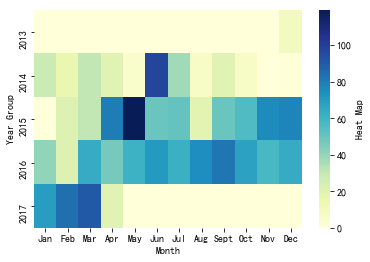

In [81]:
year_group = '2013', '2014', '2015', '2016', '2017' 
month_group = 'Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sept', 'Oct', 'Nov', 'Dec'

values = np.zeros((len(year_group),len(month_group)))
for i in range(new_dates.shape[0]):
    for year in range(len(year_group)):
        for month in range(len(month_group)):
            if new_dates[i, 1] == year_group[year] and new_dates[i, 2] == str(month+1):
                values[year, month] += 1

ax = sns.heatmap(values, xticklabels=month_group, yticklabels=year_group, cmap='YlGnBu', cbar_kws={'label': 'Heat Map'})
ax.set(xlabel='Month', ylabel='Year Group')

In [82]:
devices = np.array([str(x) for x in data.device])
new_device = np.array([])
for device in devices:
    if device.find('华为Ascend P7') != -1 or device.find('华为麦芒4') != -1 or device.find('微博 weibo.com') != -1 \
    or device.find('网易云音乐') != -1 or device.find('Android') != -1:
        if device.find('华为Ascend P7')!= -1:
            new_device = np.append(new_device, '华为Ascend P7')
        elif device.find('华为麦芒4') != -1:
            new_device = np.append(new_device, '华为麦芒4')
        elif device.find('微博 weibo.com') != -1:
            new_device = np.append(new_device, '微博 weibo.com')
        elif device.find('网易云音乐') != -1:
            new_device = np.append(new_device, '网易云音乐')
        elif device.find('Android') != -1:
            new_device = np.append(new_device, 'Android')
np.size(new_device)    

1595

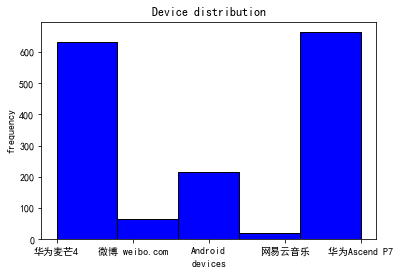

In [83]:
plt.hist(new_device, bins=5, facecolor="blue", edgecolor="black")
matplotlib.rcParams['font.sans-serif']=['SimHei']

plt.xlabel("devices")
plt.ylabel("frequency")

plt.title("Device distribution")

plt.show()

In [84]:
time = [str(x) for x in data.time]
times = np.array([])

for hour in time:
    times = np.append(times, hour[0:2])
    
times = np.array([int(time) for time in times if time != 'na'])

print(np.size(times))
print(times)

1891
[12  4  1 ...  8 23  0]


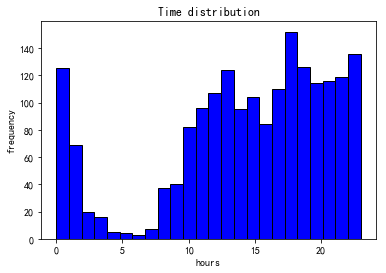

In [85]:
plt.hist(times, bins=24, facecolor="blue", edgecolor="black")

plt.xlabel("hours")
plt.ylabel("frequency")

plt.title("Time distribution")

plt.show()

In [ ]:
from ipywidgets import interact

def f(p):
    index = np.where(times == p)[0]
    print(data.content[index])

print('Weibo sending time: ')
interact(f, p=(0,23));